# Ploynomail Regression:

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [5]:
data_set =pd.read_csv("Salary Data1.csv")
data_set.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,43.0,Male,Bachelor's,Senior IT Project Manager,14.0,130000.0
1,42.0,Female,Master's,Senior Graphic Designer,15.0,110000.0
2,37.0,Male,Bachelor's,Software Project Manager,9.0,95000.0
3,50.0,Female,Bachelor's,Supply Chain Analyst,22.0,130000.0
4,32.0,Male,Master's,Senior Business Analyst,6.0,90000.0


In [10]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2051 non-null   float64
 1   Gender               2051 non-null   object 
 2   Education Level      2051 non-null   object 
 3   Job Title            2051 non-null   object 
 4   Years of Experience  2051 non-null   float64
 5   Salary               2051 non-null   float64
dtypes: float64(3), object(3)
memory usage: 96.4+ KB


In [11]:
data_set1.isnull().sum()

Age                    0
Gender                 1
Education Level        1
Job Title              1
Years of Experience    0
Salary                 0
dtype: int64

In [12]:
data_set1.dropna()
data_set1.fillna(data_set1.mean(), inplace=True)


<Axes: >

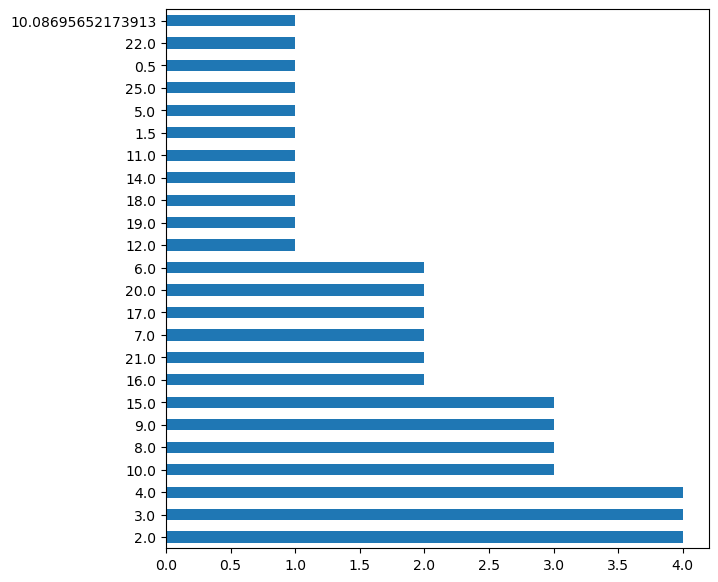

In [13]:
data_set1['Years of Experience'].value_counts().plot(kind="barh", figsize=(7, 7))


<Axes: >

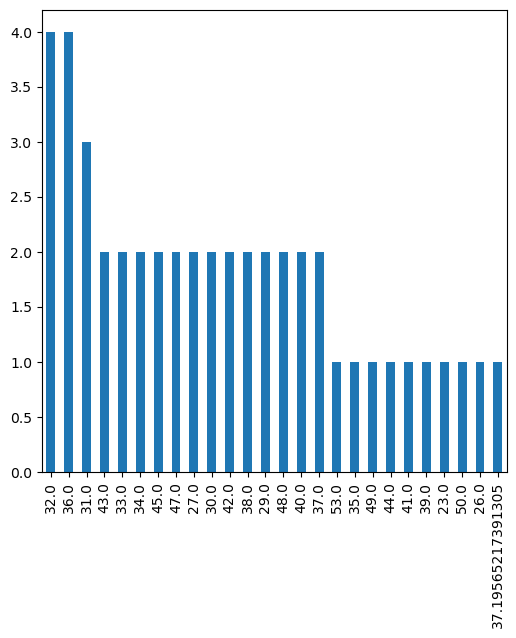

In [14]:
data_set1['Age'].value_counts().plot(kind="bar", figsize=(6, 6))


In [15]:
data_set1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,43.0,Male,Bachelor's,Senior IT Project Manager,14.0,130000.0
1,42.0,Female,Master's,Senior Graphic Designer,15.0,110000.0
2,37.0,Male,Bachelor's,Software Project Manager,9.0,95000.0
3,50.0,Female,Bachelor's,Supply Chain Analyst,22.0,130000.0
4,32.0,Male,Master's,Senior Business Analyst,6.0,90000.0


In [16]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder=LabelEncoder()

data_set1["Gender"]=Label_Encoder.fit_transform(data_set1["Gender"])
data_set1["Education Level"]=Label_Encoder.fit_transform(data_set1["Education Level"])
data_set1["Job Title"]=Label_Encoder.fit_transform(data_set1["Job Title"])
data_set1.head(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,43.0,1,0,27,14.0,130000.0
1,42.0,0,1,25,15.0,110000.0
2,37.0,1,0,37,9.0,95000.0
3,50.0,0,0,38,22.0,130000.0
4,32.0,1,1,22,6.0,90000.0


In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_set1["Age"]=scaler.fit_transform(data_set1[["Age"]])
data_set1["Years of Experience"]=scaler.fit_transform(data_set1[["Years of Experience"]])
data_set1["Job Title"]=scaler.fit_transform(data_set1[["Job Title"]])

data_set1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,0.819597,1,0,0.706226,0.589607,130000.0
1,0.678393,0,1,0.529199,0.740284,110000.0
2,-0.027627,1,0,1.591362,-0.163780,95000.0
3,1.808026,0,0,1.679876,1.795025,130000.0
4,-0.733647,1,1,0.263658,-0.615812,90000.0


In [18]:
X = data_set1[["Age", "Gender", "Education Level", "Job Title", "Years of Experience"]]
y = data_set1["Salary"]


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y ,test_size=0.2,random_state=42)

In [29]:
poly = PolynomialFeatures(degree=2)  
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_pred_poly = poly_model.predict(X_test_poly)

In [30]:
r2_poly = r2_score(y_test, y_pred_poly)

print("R-squared (Polynomial Regression) is {0:.2f}% :". format( 100*r2_poly))

R-squared (Polynomial Regression) is 92.23% :
